## "MarketAnalyticTool" for quantative analysis of stocks
---

**Created By Paras Patange**


**Goal:** To create a tool which will utilise data from the web and compute popular performance metrics.


**Import Statements:**

In [34]:
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import sklearn
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import pandas as pd
import yfinance as yf

### Function for fetching data

In [35]:

market_suffixes = {
    "US": "",
    "CA": ".TO",
    "DE": ".DE",
    "UK": ".L",
    "FR": ".PA",
    "IT": ".MI",
    "ES": ".MC",
    "JP": ".T",
    "HK": ".HK",
    "CN": ".SS",  # Shanghai
    "SZ": ".SZ",  # Shenzhen
    "IN": ".NS",
    "AU": ".AX",
    "BR": ".SA",
}

def fetch_stock_data(market: str, tickers: list, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Fetch historical stock data for given tickers and time period.
    
    Parameters:
    - market (str): The market identifier (e.g., "US", "IN").
    - tickers (list): List of stock tickers.
    - start_date (str): Start date in the format "YYYY-MM-DD".
    - end_date (str): End date in the format "YYYY-MM-DD".
    
    Returns:
    - pd.DataFrame: DataFrame containing the historical stock data.
    """
    # Get the market suffix
    suffix = market_suffixes.get(market, "")
    
    # Modify tickers for the specified market
    tickers = [ticker + suffix for ticker in tickers]
    
    # Fetch historical stock prices
    data = yf.download(tickers, start=start_date, end=end_date)
    
    return data

# Change this for Stock Analysis
- Inclusive of all stock exchanges

In [36]:
# Example usage for US market
tickers_t = ["AMZN", "TSLA","MSFT", "AAPL"] # "MSFT", "AAPL"
start_date_t = "2023-05-01"
end_date_t = "2024-05-19"
market_t = "US"
data = fetch_stock_data(market_t, tickers_t, start_date_t, end_date_t)
print(data.head())
print("LENGTH IS", len(data))

[*********************100%%**********************]  4 of 4 completed
             Adj Close                                           Close  \
                  AAPL        AMZN        MSFT        TSLA        AAPL   
Date                                                                     
2023-05-01  168.461105  102.050003  302.526886  161.830002  169.589996   
2023-05-02  167.418076  103.629997  302.378387  160.309998  168.539993   
2023-05-03  166.335327  103.650002  301.378448  160.610001  167.449997   
2023-05-04  164.686371  104.000000  302.378387  161.199997  165.789993   
2023-05-05  172.414612  105.660004  307.566376  170.059998  173.570007   

                                                      High              ...  \
                  AMZN        MSFT        TSLA        AAPL        AMZN  ...   
Date                                                                    ...   
2023-05-01  102.050003  305.559998  161.830002  170.449997  105.230003  ...   
2023-05-02  103.629997

If unstacked dataframe is required, run the following:

In [37]:
# Unstack the multi-level columns
df_unstacked = data.stack(level=0)

# Display the unstacked dataframe
print(df_unstacked)

                              AAPL          AMZN          MSFT          TSLA
Date                                                                        
2023-05-01 Adj Close  1.684611e+02  1.020500e+02  3.025269e+02  1.618300e+02
           Close      1.695900e+02  1.020500e+02  3.055600e+02  1.618300e+02
           High       1.704500e+02  1.052300e+02  3.086000e+02  1.632800e+02
           Low        1.686400e+02  1.018200e+02  3.051500e+02  1.588300e+02
           Open       1.692800e+02  1.049500e+02  3.069700e+02  1.631700e+02
...                            ...           ...           ...           ...
2024-05-17 Close      1.898700e+02  1.847000e+02  4.202100e+02  1.774600e+02
           High       1.908100e+02  1.853000e+02  4.229200e+02  1.796300e+02
           Low        1.891800e+02  1.833500e+02  4.180300e+02  1.727500e+02
           Open       1.895100e+02  1.837600e+02  4.225400e+02  1.735500e+02
           Volume     4.126080e+07  3.181370e+07  1.533420e+07  7.662760e+07

Visualise the data with matplotlib:

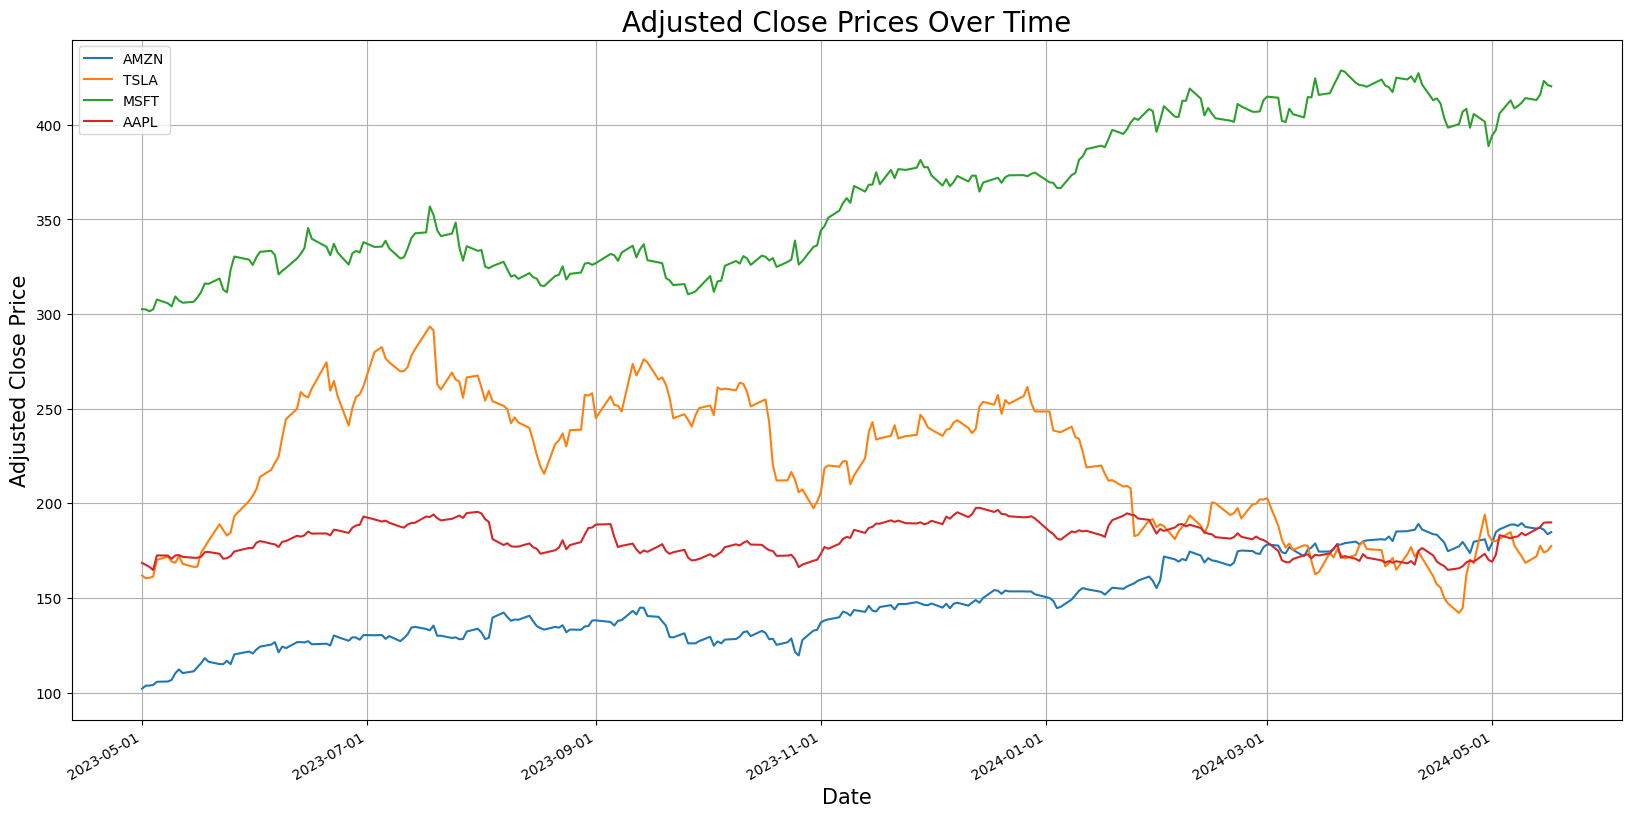

In [38]:
# import matplotlib.pyplot as plt
# from matplotlib.dates import DateFormatter

# # Plotting
# plt.figure(figsize=(20, 10))

# if len(tickers) == 1:
#     ticker = tickers[0]
#     if isinstance(data.index, pd.DatetimeIndex):
#         plt.plot(data.index, data['Adj Close'][ticker], label=ticker)
# else:
#     for ticker in tickers:
#         if isinstance(data.index, pd.DatetimeIndex):
#             plt.plot(data.index, data['Adj Close'][ticker], label=ticker)

# plt.title('Adjusted Close Prices Over Time')
# plt.xlabel('Date')
# plt.ylabel('Adjusted Close Price')
# plt.legend()
# plt.grid(True)
# plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
# plt.gcf().autofmt_xdate()
# plt.show()

def plot_stock_data(data, tickers):
    plt.figure(figsize=(20, 10))

    if len(tickers) == 1:
        ticker = tickers[0]
        plt.plot(data.index, data['Adj Close'][ticker], label=ticker)
    else:
        for ticker in tickers:
            plt.plot(data.index, data['Adj Close'][ticker], label=ticker)

    plt.title('Adjusted Close Prices Over Time', fontsize=20)
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Adjusted Close Price', fontsize=15)
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.show()

    # Plotting the data
plot_stock_data(data, tickers_t)


**RISK ANALYSIS ATTEMPT**

***Volatility:***

Definition: Volatility measures the degree of variation of a trading price series over time. It is a statistical measure of the dispersion of returns for a given security or market index.
Interpretation: Higher volatility indicates greater potential for price fluctuations, reflecting increased market uncertainty or risk.
Sharpe Ratio:

Definition: The Sharpe ratio is a measure of risk-adjusted return. It calculates the excess return (return above the risk-free rate) per unit of risk (volatility).
Interpretation: A higher Sharpe ratio indicates a better risk-adjusted performance. It helps investors assess the return earned for the amount of risk taken.

***Value at Risk (VaR):***

Definition: VaR is a measure of the potential loss on an investment over a specific time period at a given confidence level. It quantifies the maximum loss that might occur, assuming normal market conditions.
Interpretation: A VaR of 5% at a 95% confidence level means there is a 5% chance that losses will exceed the calculated VaR.

***Cumulative Returns:***

Definition: Cumulative returns show the total returns of an investment over a specific time period. It is calculated by multiplying the daily return ratios over time.
Interpretation: Cumulative returns provide a straightforward way to assess the overall performance of an investment from the beginning to the end of the chosen period.

***Drawdown:***

Definition: Drawdown measures the peak-to-trough decline during a specific period for an investment. It represents the percentage decline from the highest cumulative return to the lowest point.
Interpretation: Drawdown helps investors understand the risk of a particular investment by quantifying the magnitude of losses experienced during a downturn.

***Maximum Drawdown:***

Definition: Maximum drawdown is the maximum percentage loss from the peak to the trough of an investment during a specified time period.
Interpretation: It provides a measure of the largest potential loss an investor could have experienced during the worst-performing period of the investment.

Processing ticker: AMZN


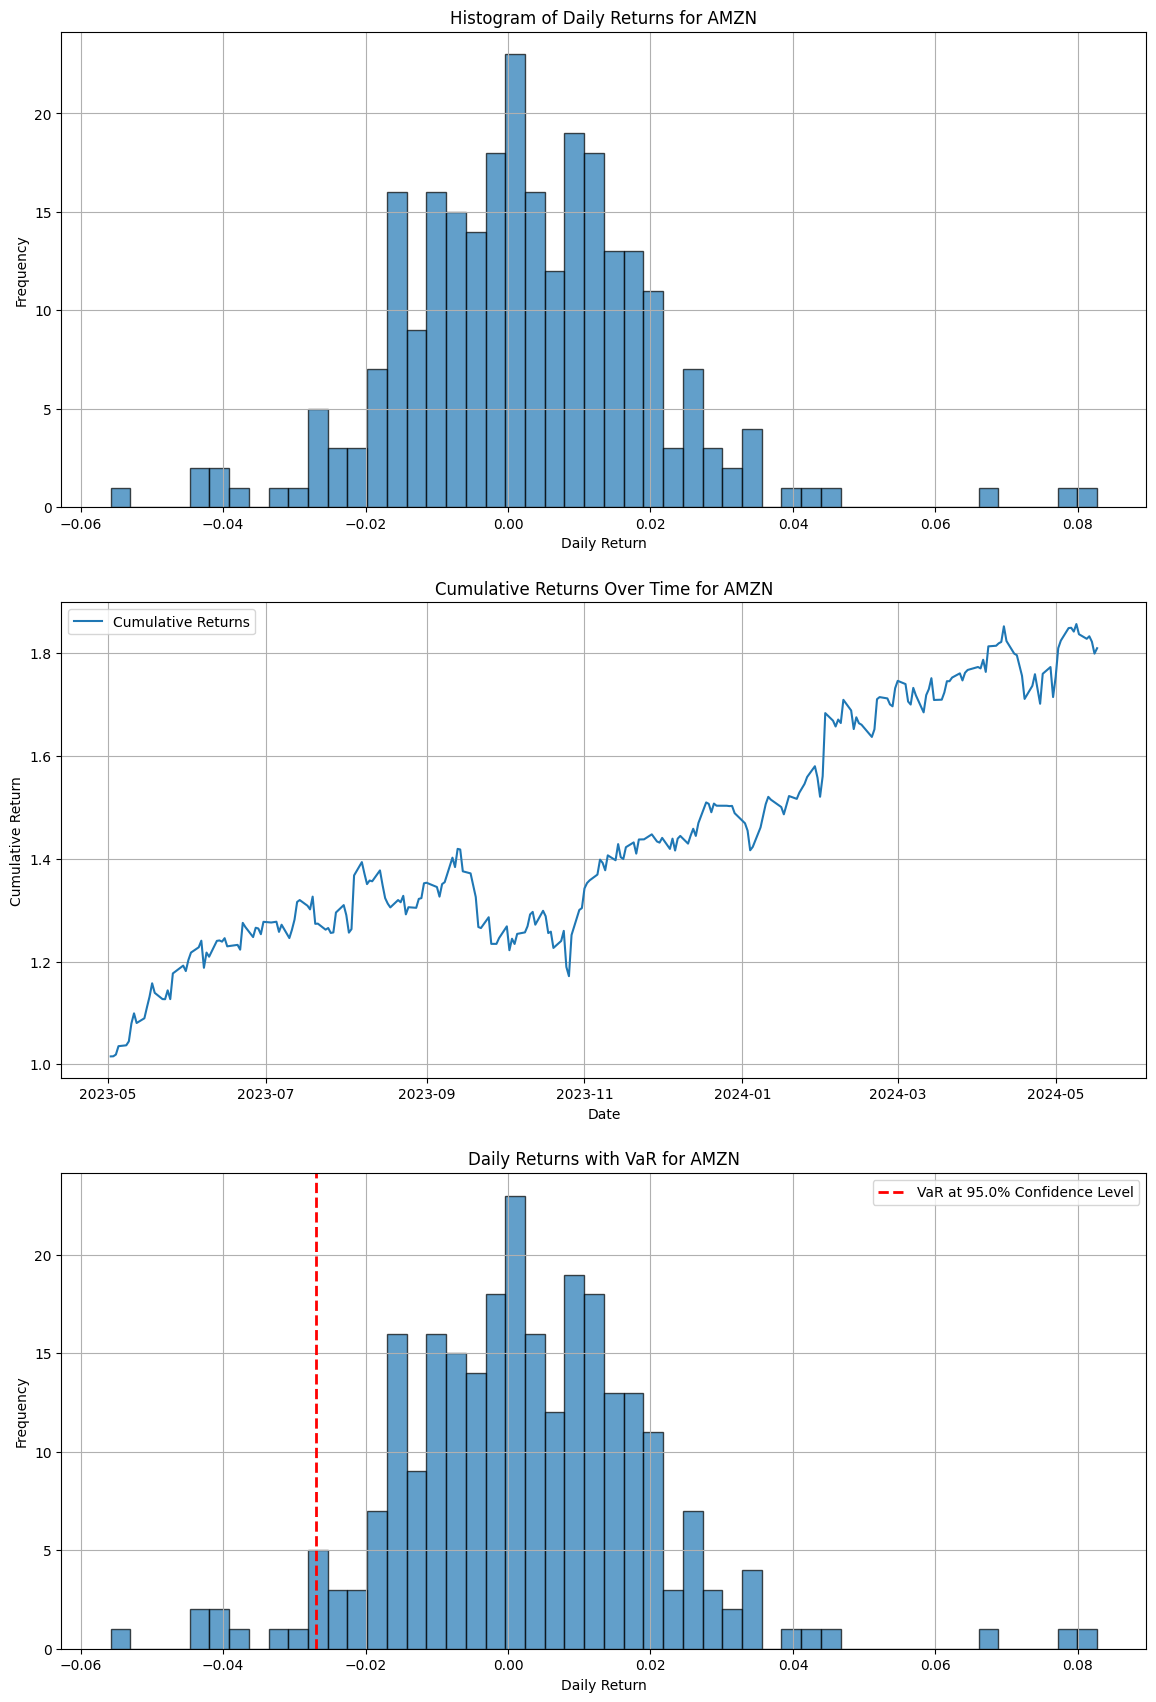

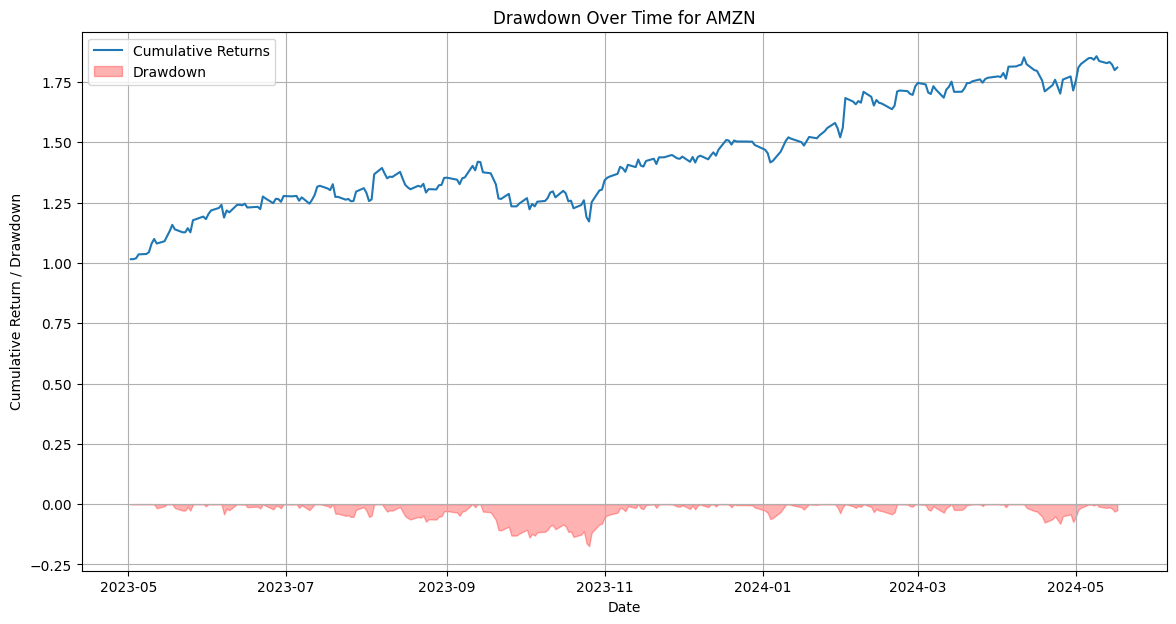

Metrics for AMZN:
------------------------------------------------------------------------------------------------------------------------------------
Volatility: 0.01786318866422767
  
-------------------------
Sharpe Ratio: 2.1394102598766125
  
-------------------------
Value at Risk (VaR) at 95.0% confidence level: -0.026974905537151463
  
-------------------------
Maximum Drawdown: -0.1745254079632225


Processing ticker: TSLA


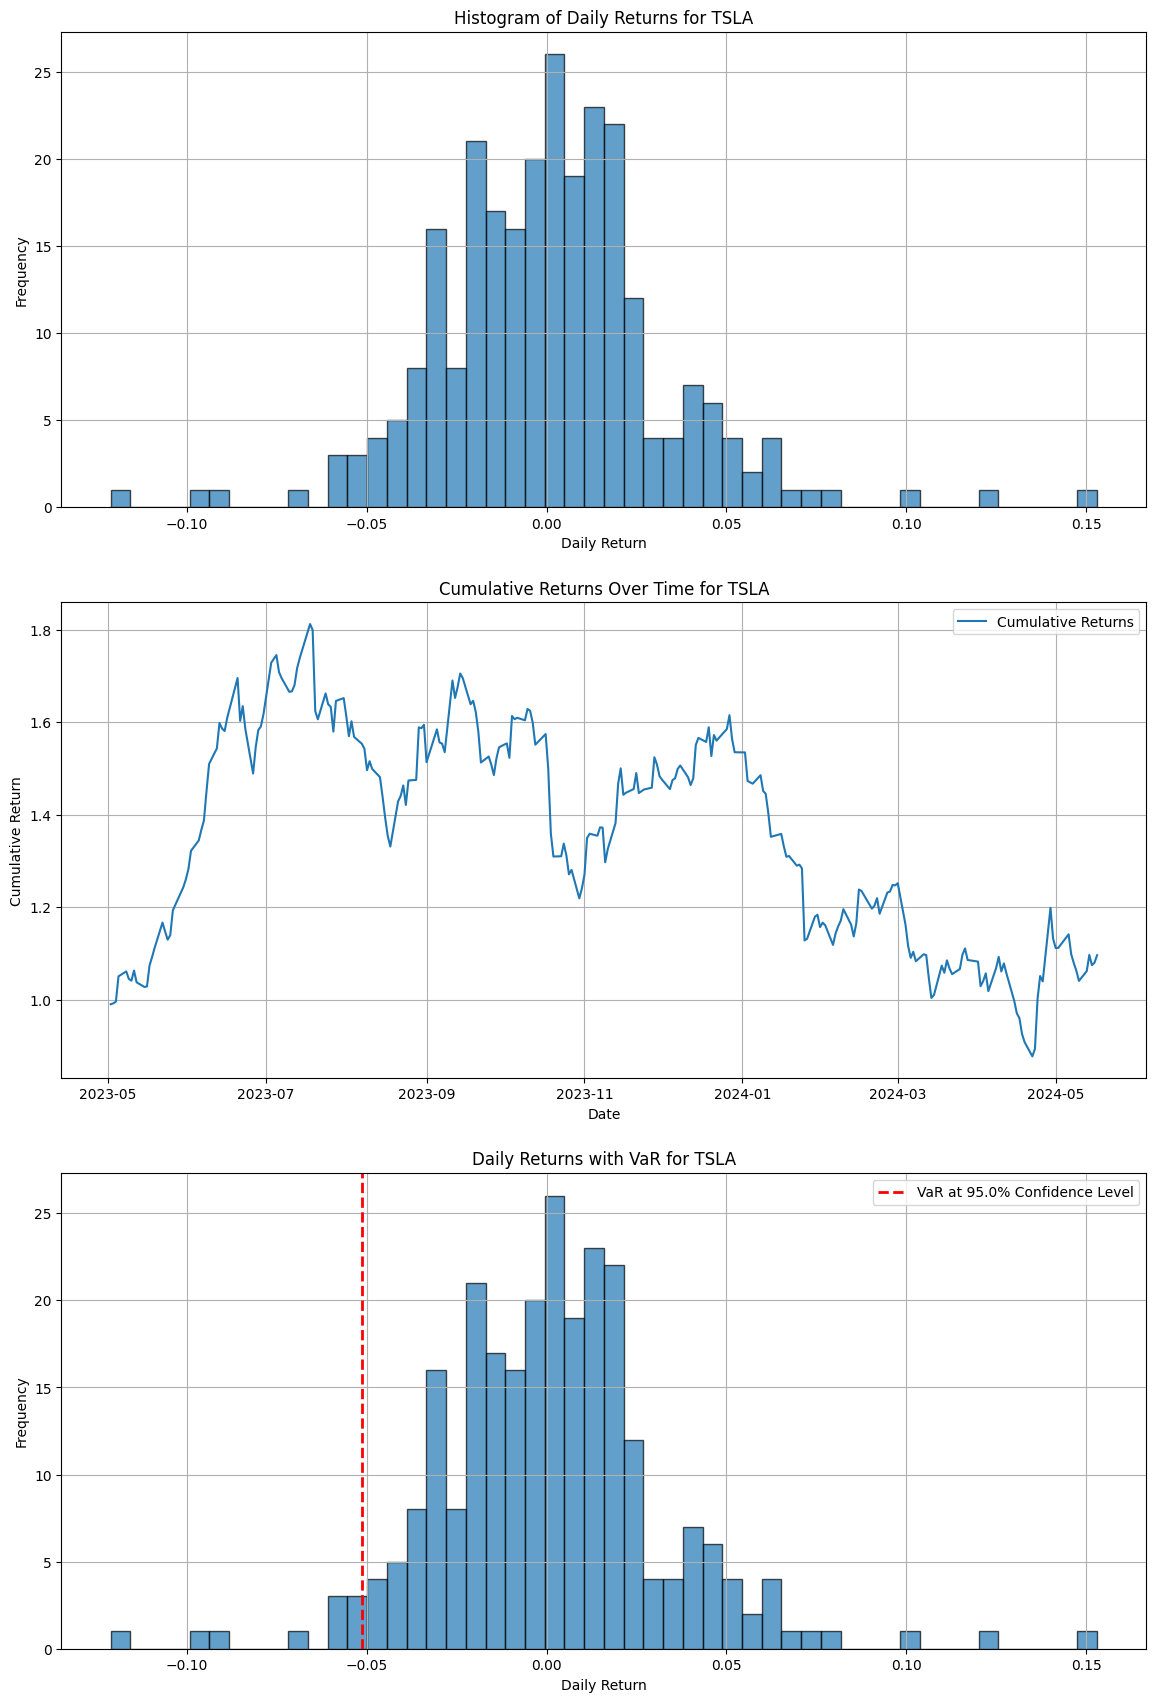

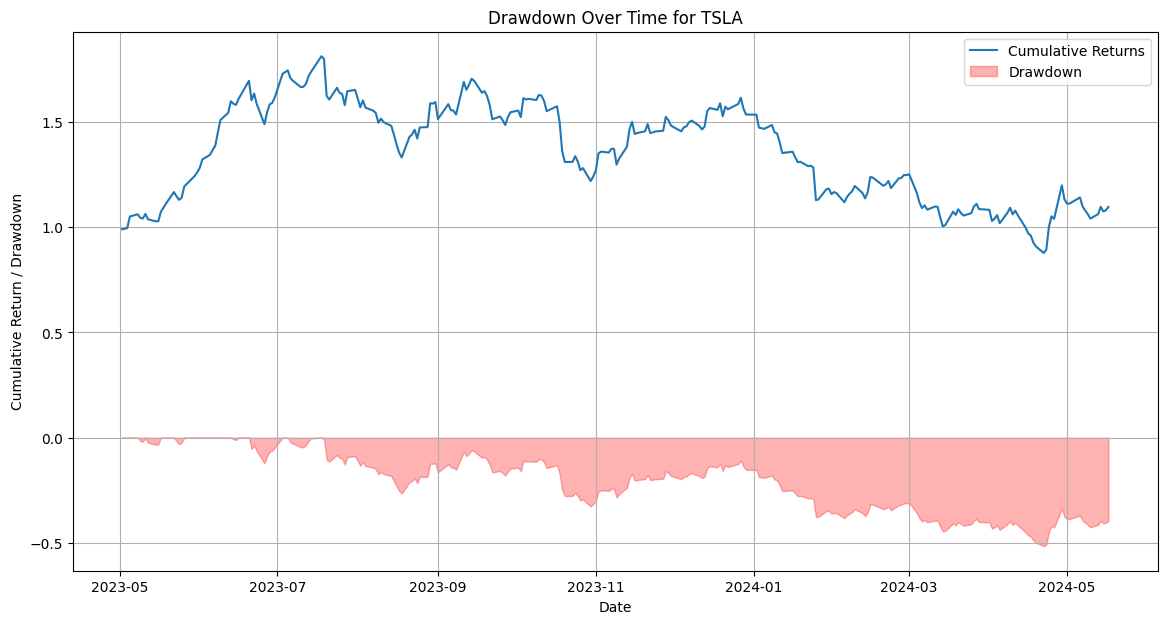

Metrics for TSLA:
------------------------------------------------------------------------------------------------------------------------------------
Volatility: 0.03181922425827639
  
-------------------------
Sharpe Ratio: 0.4240911970618309
  
-------------------------
Value at Risk (VaR) at 95.0% confidence level: -0.051487908396675844
  
-------------------------
Maximum Drawdown: -0.5157496256046373


Processing ticker: MSFT


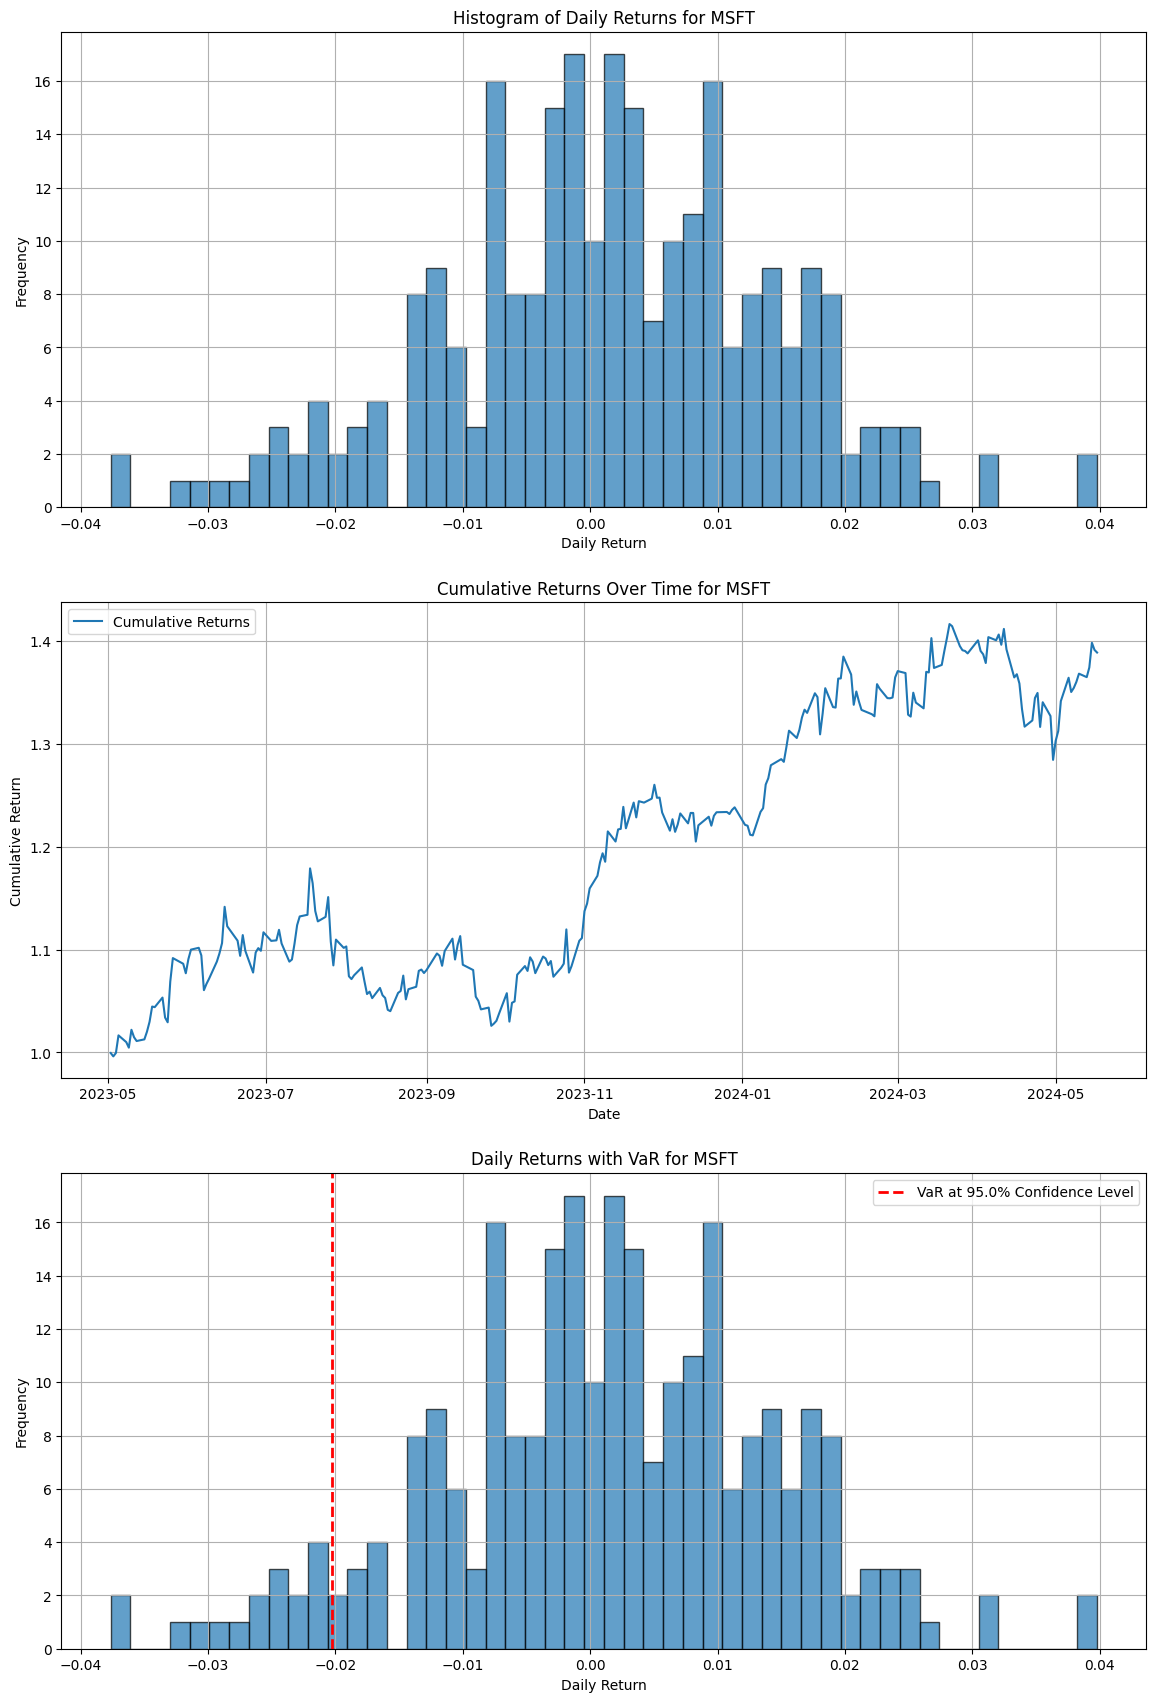

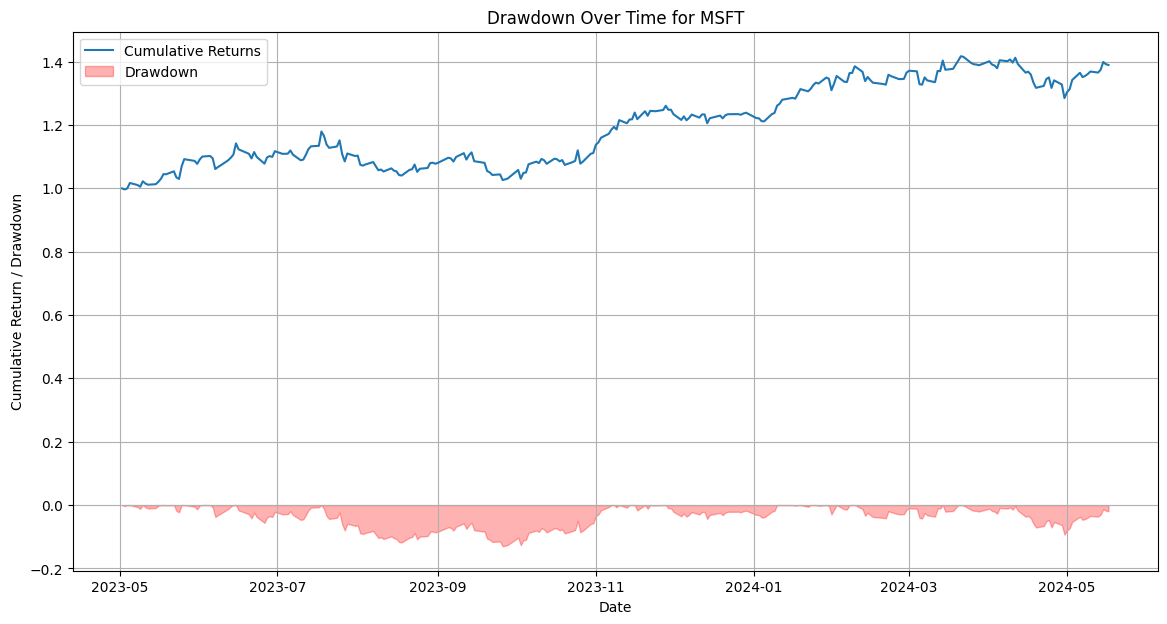

Metrics for MSFT:
------------------------------------------------------------------------------------------------------------------------------------
Volatility: 0.013112213247017666
  
-------------------------
Sharpe Ratio: 1.611518449357695
  
-------------------------
Value at Risk (VaR) at 95.0% confidence level: -0.020236570500086135
  
-------------------------
Maximum Drawdown: -0.12987590874798785


Processing ticker: AAPL


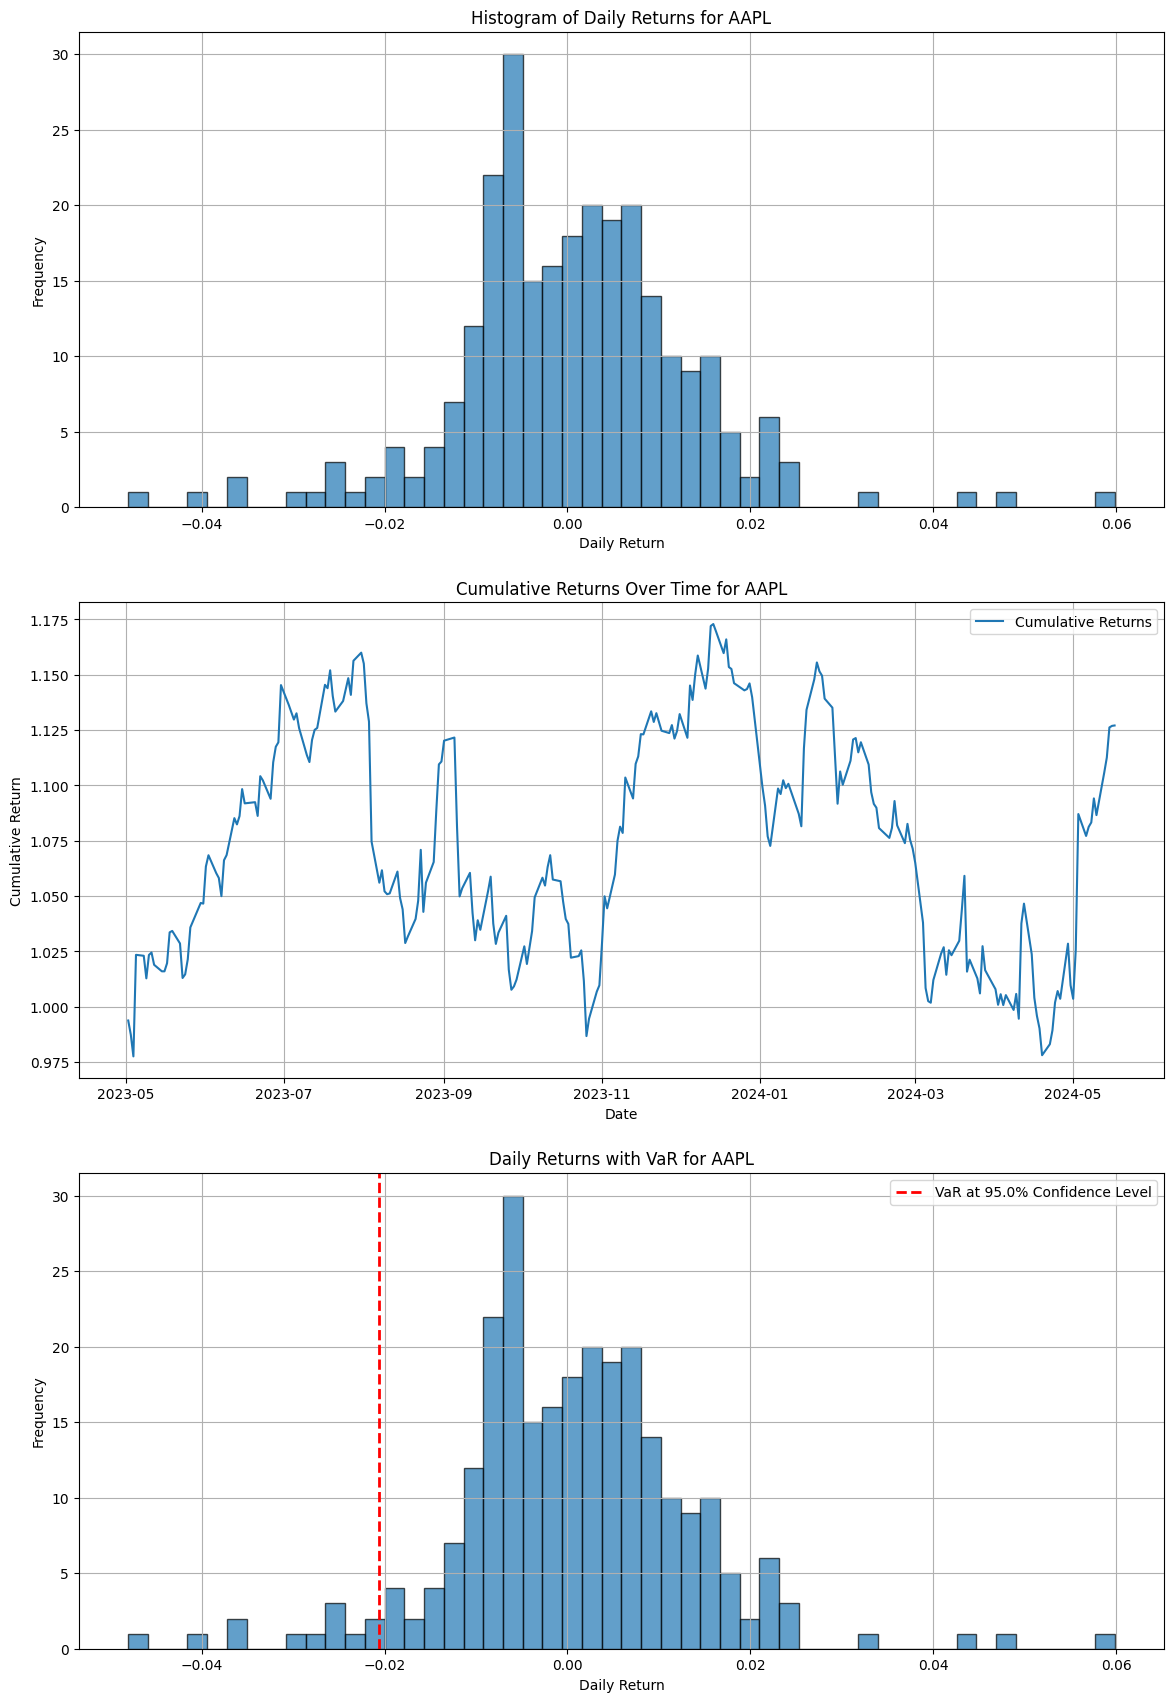

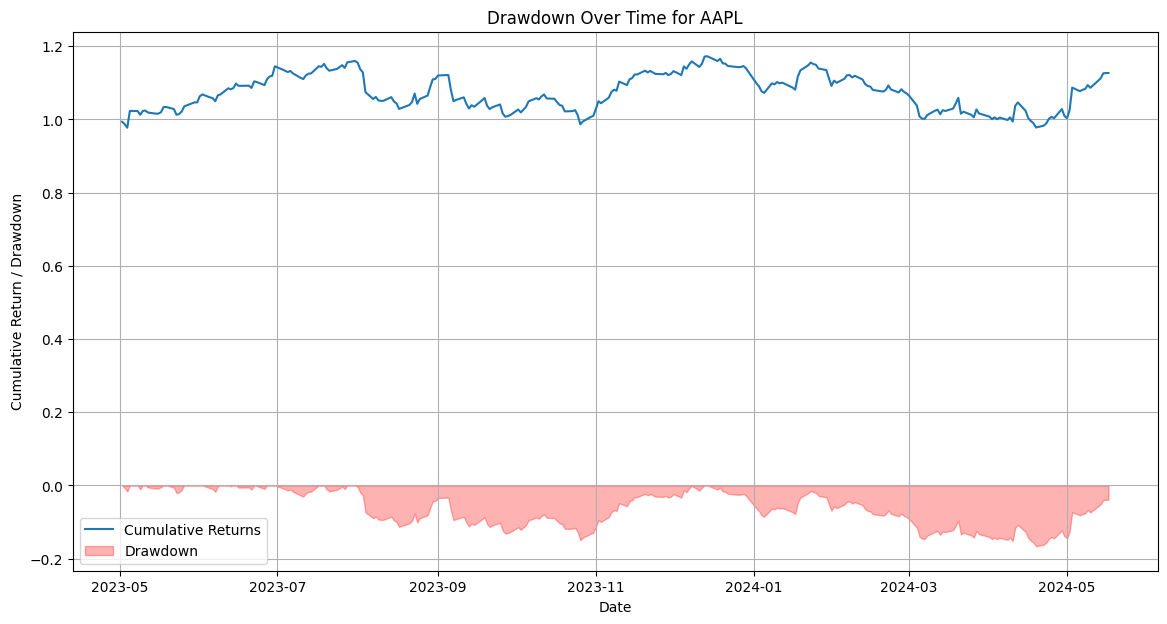

Metrics for AAPL:
------------------------------------------------------------------------------------------------------------------------------------
Volatility: 0.012841144624702245
  
-------------------------
Sharpe Ratio: 0.6616968870835437
  
-------------------------
Value at Risk (VaR) at 95.0% confidence level: -0.02058654606020727
  
-------------------------
Maximum Drawdown: -0.16606659223751216




In [39]:
# import numpy as np
# from scipy.stats import norm

# # Calculate volatility
# daily_returns = data['Adj Close'].pct_change()
# volatility = daily_returns.std()

# # Calculate Sharpe ratio
# sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)

# # Calculate Value at Risk (VaR)
# confidence_level = 0.95
# var = norm.ppf(1 - confidence_level, daily_returns.mean(), daily_returns.std())

# # Calculate cumulative returns
# cumulative_returns = (1 + daily_returns).cumprod()

# # Calculate drawdown and maximum drawdown
# peak = cumulative_returns.cummax()
# drawdown = (cumulative_returns - peak) / peak
# max_drawdown = drawdown.min()

# # Print or use the calculated metrics as needed
# print("Metrics:")
# print("------------------------------------------------------------------------------------------------------------------------------------")
# print("Volatility:", volatility)
# print("  ")
# print("-------------------------")
# print("Sharpe Ratio:", sharpe_ratio)
# print("  ")
# print("-------------------------")
# print(f"Value at Risk (VaR) at {confidence_level * 100}% confidence level:", var)
# print("  ")
# print("-------------------------")
# print("Maximum Drawdown:", max_drawdown)


import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Calculate and plot metrics for each ticker
def calculate_and_plot_metrics(data, tickers, confidence_level=0.95):
    for ticker in tickers:
        # Calculate metrics
        print(f"Processing ticker: {ticker}")
        daily_returns = data['Adj Close'][ticker].pct_change().dropna()
        volatility = daily_returns.std()
        sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)
        var = norm.ppf(1 - confidence_level, daily_returns.mean(), daily_returns.std())
        cumulative_returns = (1 + daily_returns).cumprod()
        peak = cumulative_returns.cummax()
        drawdown = (cumulative_returns - peak) / peak
        max_drawdown = drawdown.min()

        # Create a combined plot with subplots
        fig, axes = plt.subplots(3, 1, figsize=(14, 21))

        # Plot histogram of daily returns for volatility
        axes[0].hist(daily_returns, bins=50, alpha=0.7, edgecolor='k')
        axes[0].set_title(f'Histogram of Daily Returns for {ticker}')
        axes[0].set_xlabel('Daily Return')
        axes[0].set_ylabel('Frequency')
        axes[0].grid(True)

        # Plot cumulative returns
        axes[1].plot(cumulative_returns, label='Cumulative Returns')
        axes[1].set_title(f'Cumulative Returns Over Time for {ticker}')
        axes[1].set_xlabel('Date')
        axes[1].set_ylabel('Cumulative Return')
        axes[1].legend()
        axes[1].grid(True)

        # Plot daily returns with VaR
        axes[2].hist(daily_returns, bins=50, alpha=0.7, edgecolor='k')
        axes[2].axvline(var, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_level*100}% Confidence Level')
        axes[2].set_title(f'Daily Returns with VaR for {ticker}')
        axes[2].set_xlabel('Daily Return')
        axes[2].set_ylabel('Frequency')
        axes[2].legend()
        axes[2].grid(True)

        # Plot drawdown
        fig, ax = plt.subplots(figsize=(14, 7))
        ax.plot(cumulative_returns, label='Cumulative Returns')
        ax.fill_between(drawdown.index, drawdown, color='red', alpha=0.3, label='Drawdown')
        ax.set_title(f'Drawdown Over Time for {ticker}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Cumulative Return / Drawdown')
        ax.legend()
        ax.grid(True)
        plt.show()

        # Print metrics
        print(f"Metrics for {ticker}:")
        print("------------------------------------------------------------------------------------------------------------------------------------")
        print("Volatility:", volatility)
        print("  ")
        print("-------------------------")
        print("Sharpe Ratio:", sharpe_ratio)
        print("  ")
        print("-------------------------")
        print(f"Value at Risk (VaR) at {confidence_level * 100}% confidence level:", var)
        print("  ")
        print("-------------------------")
        print("Maximum Drawdown:", max_drawdown)
        print("\n")

        
# Calculate and plot metrics for each ticker
calculate_and_plot_metrics(data, tickers_t)


# Visualisation:

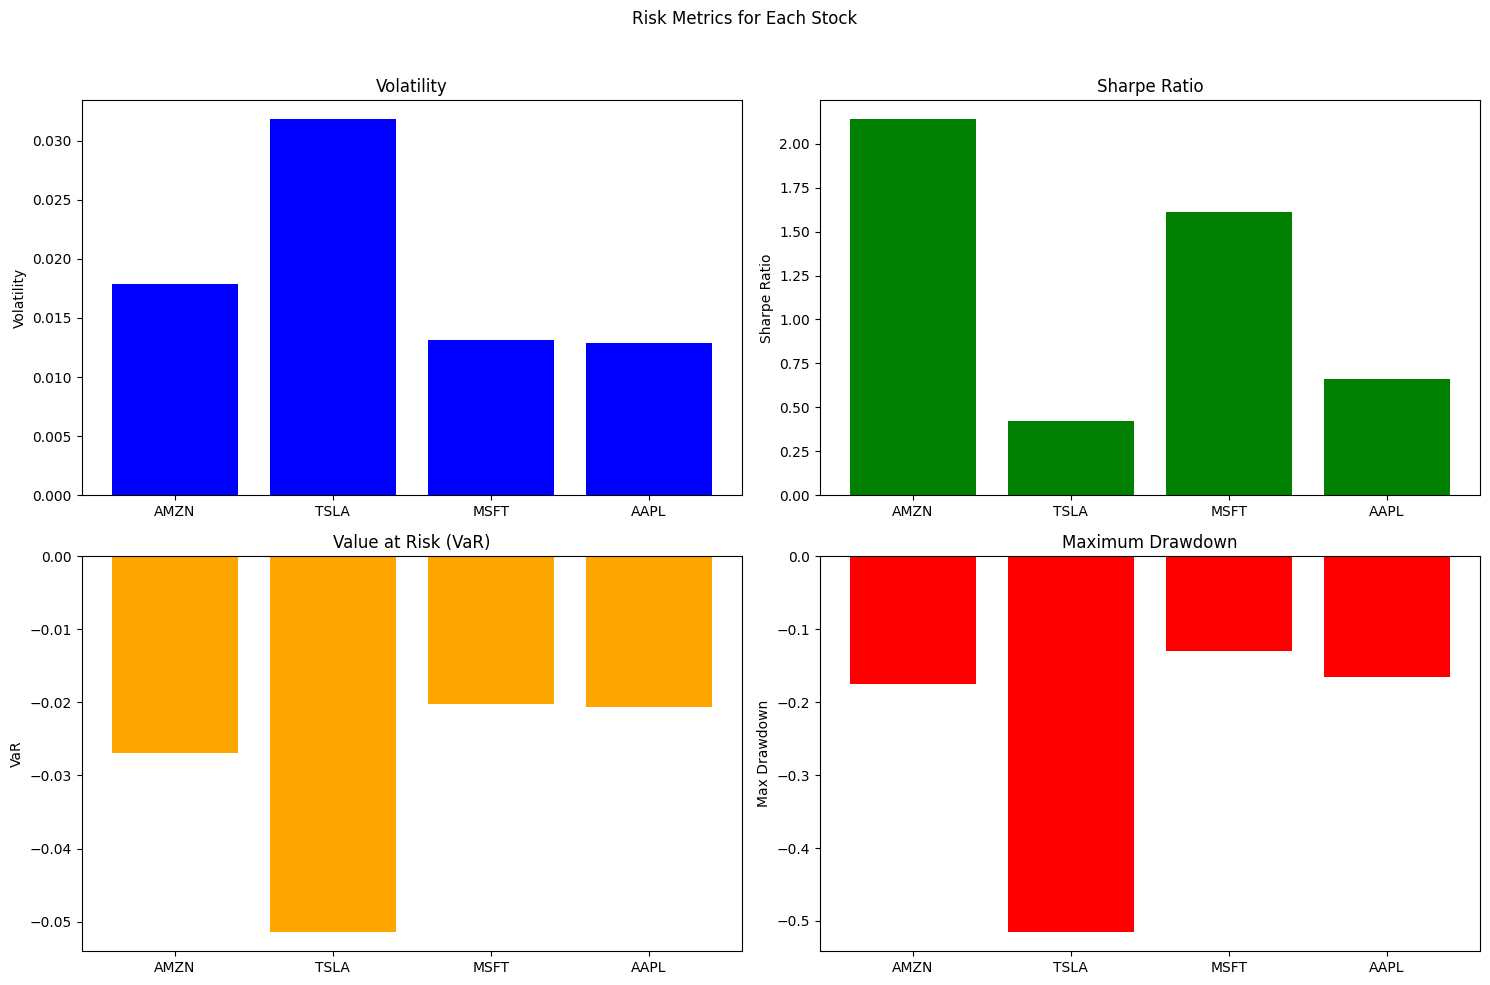

In [40]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import norm

# # Initialize lists to store metrics for each stock
# volatilities = []
# sharpe_ratios = []
# vars = []
# max_drawdowns = []

# # Calculate metrics for each stock
# for ticker in tickers_t:
#     # Calculate daily returns
#     daily_returns = data['Adj Close'][ticker].pct_change().dropna()

#     # Calculate volatility
#     volatility = daily_returns.std()
#     volatilities.append(volatility)

#     # Calculate Sharpe ratio
#     sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)
#     sharpe_ratios.append(sharpe_ratio)

#     # Calculate Value at Risk (VaR)
#     confidence_level = 0.95
#     var = norm.ppf(1 - confidence_level, daily_returns.mean(), daily_returns.std())
#     vars.append(var)

#     # Calculate drawdown and maximum drawdown
#     cumulative_returns = (1 + daily_returns).cumprod()
#     peak = cumulative_returns.cummax()
#     drawdown = (cumulative_returns - peak) / peak
#     max_drawdown = drawdown.min()
#     max_drawdowns.append(max_drawdown)

# # Create subplots for each metric
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
# fig.suptitle('Risk Metrics for Each Stock')

# # Volatility
# axes[0, 0].bar(tickers_t, volatilities, color='blue')
# axes[0, 0].set_title('Volatility')
# axes[0, 0].set_ylabel('Volatility')

# # Sharpe Ratio
# axes[0, 1].bar(tickers_t, sharpe_ratios, color='green')
# axes[0, 1].set_title('Sharpe Ratio')
# axes[0, 1].set_ylabel('Sharpe Ratio')

# # Value at Risk (VaR)
# axes[1, 0].bar(tickers_t, vars, color='orange')
# axes[1, 0].set_title('Value at Risk (VaR)')
# axes[1, 0].set_ylabel('VaR')

# # Maximum Drawdown
# axes[1, 1].bar(tickers_t, max_drawdowns, color='red')
# axes[1, 1].set_title('Maximum Drawdown')
# axes[1, 1].set_ylabel('Max Drawdown')

# # Adjust layout and show the plot
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_risk_metrics(data, tickers, confidence_level=0.95):
    # Initialize lists to store metrics for each stock
    volatilities = []
    sharpe_ratios = []
    vars = []
    max_drawdowns = []

    # Calculate metrics for each stock
    for ticker in tickers:
        try:
            # Calculate daily returns
            daily_returns = data['Adj Close'][ticker].pct_change().dropna()

            # Calculate volatility
            volatility = daily_returns.std()
            volatilities.append(volatility)

            # Calculate Sharpe ratio
            sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)
            sharpe_ratios.append(sharpe_ratio)

            # Calculate Value at Risk (VaR)
            var = norm.ppf(1 - confidence_level, daily_returns.mean(), daily_returns.std())
            vars.append(var)

            # Calculate drawdown and maximum drawdown
            cumulative_returns = (1 + daily_returns).cumprod()
            peak = cumulative_returns.cummax()
            drawdown = (cumulative_returns - peak) / peak
            max_drawdown = drawdown.min()
            max_drawdowns.append(max_drawdown)
            
        except Exception as e:
            print(f"Error processing {ticker}: {e}")
            volatilities.append(np.nan)
            sharpe_ratios.append(np.nan)
            vars.append(np.nan)
            max_drawdowns.append(np.nan)

    # Create subplots for each metric
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    fig.suptitle('Risk Metrics for Each Stock')

    # Volatility
    axes[0, 0].bar(tickers, volatilities, color='blue')
    axes[0, 0].set_title('Volatility')
    axes[0, 0].set_ylabel('Volatility')

    # Sharpe Ratio
    axes[0, 1].bar(tickers, sharpe_ratios, color='green')
    axes[0, 1].set_title('Sharpe Ratio')
    axes[0, 1].set_ylabel('Sharpe Ratio')

    # Value at Risk (VaR)
    axes[1, 0].bar(tickers, vars, color='orange')
    axes[1, 0].set_title('Value at Risk (VaR)')
    axes[1, 0].set_ylabel('VaR')

    # Maximum Drawdown
    axes[1, 1].bar(tickers, max_drawdowns, color='red')
    axes[1, 1].set_title('Maximum Drawdown')
    axes[1, 1].set_ylabel('Max Drawdown')

    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# Calculate and plot risk metrics for each ticker
plot_risk_metrics(data, tickers_t)


# Portfolio Construction:


Mean Returns:
 AAPL    0.000535
AMZN    0.002407
MSFT    0.001331
TSLA    0.000850
dtype: float64
Covariance Matrix:
           AAPL      AMZN      MSFT      TSLA
AAPL  0.000165  0.000078  0.000080  0.000152
AMZN  0.000078  0.000319  0.000133  0.000144
MSFT  0.000080  0.000133  0.000172  0.000107
TSLA  0.000152  0.000144  0.000107  0.001012
Test Objective Function Value: -0.09268212923654993
Optimal Weights:
AMZN: 0.0000
TSLA: 0.6924
MSFT: 0.3076
AAPL: 0.0000
Simulated Portfolio Returns: [0.00115748 0.00114603 0.0010232  0.00095509 0.00151364]
Simulated Portfolio Volatilities: [0.01838794 0.01514554 0.02209379 0.01367672 0.01319994]


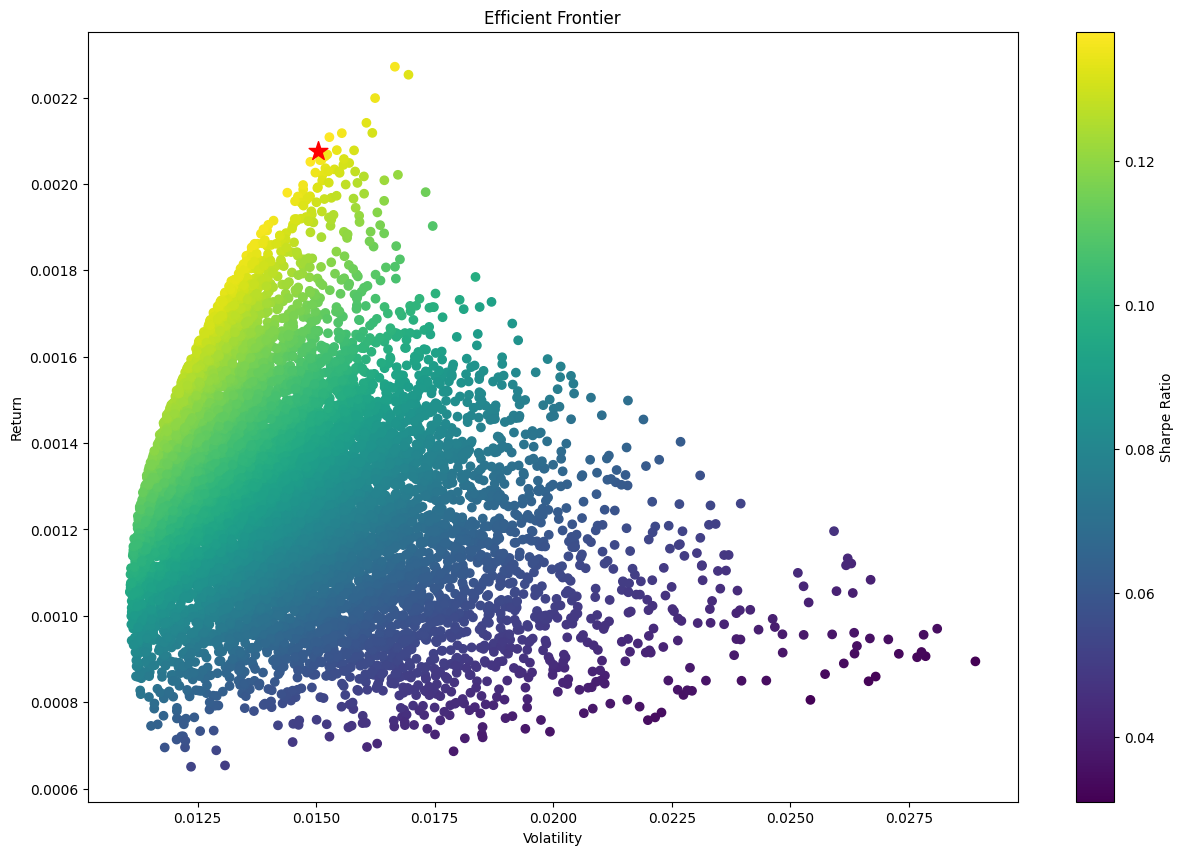

-----------------------------------------------------------
-----------------------------------------------------------
-----------------------------------------------------------
Optimal Weights:
AMZN: 0.0000
TSLA: 0.6924
MSFT: 0.3076
AAPL: 0.0000
-----------------------------------------------------------
-----------------------------------------------------------
-----------------------------------------------------------


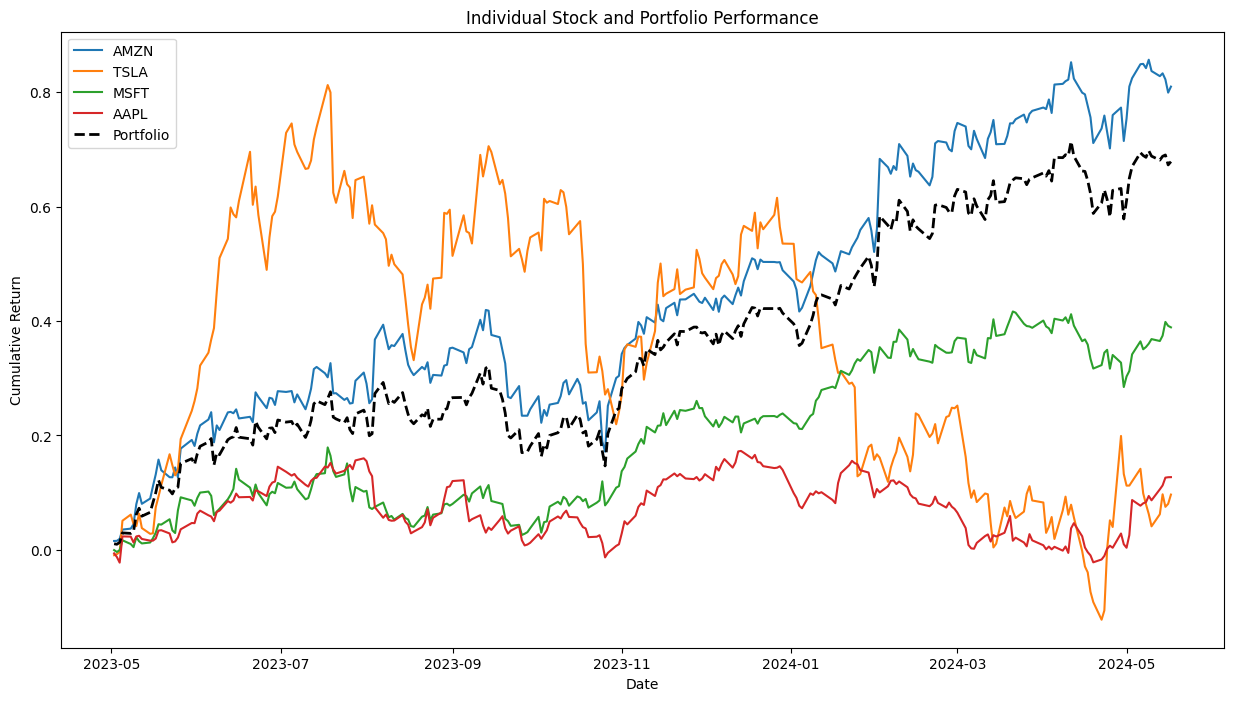

In [53]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Define the objective function for optimization (negative Sharpe ratio to maximize)
def objective(weights, mean_returns, cov_matrix, risk_free_rate=0.0):
    p_return, p_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    sharpe_ratio = (p_return - risk_free_rate) / p_volatility
    return -sharpe_ratio

# Define constraints and bounds
def get_constraints():
    return ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

def get_bounds(num_assets):
    return tuple((0, 1) for _ in range(num_assets))

def optimize_portfolio(mean_returns, cov_matrix, initial_weights):
    constraints = get_constraints()
    bounds = get_bounds(len(initial_weights))
    result = minimize(objective, initial_weights, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# Simulate random portfolios
def simulate_random_portfolios(num_portfolios, mean_returns, cov_matrix):
    port_returns = []
    port_volatilities = []
    num_assets = len(mean_returns)
    
    for _ in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        p_return, p_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
        port_returns.append(p_return)
        port_volatilities.append(p_volatility)
        
    return np.array(port_returns), np.array(port_volatilities)

# Calculate mean returns and covariance matrix
mean_returns = data['Adj Close'].pct_change().mean()
cov_matrix = data['Adj Close'].pct_change().cov()
print("Mean Returns:\n", mean_returns)
print("Covariance Matrix:\n", cov_matrix)

# Initial weights (equal distribution)
num_assets = len(tickers_t)
initial_weights = np.array([1. / num_assets] * num_assets)

# Test the objective function
print("Test Objective Function Value:", objective(initial_weights, mean_returns, cov_matrix))

# Optimize portfolio to find optimal weights
optimal_weights = optimize_portfolio(mean_returns, cov_matrix, initial_weights)

# Display optimal weights
print("Optimal Weights:")
for ticker, weight in zip(tickers_t, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

# Simulate portfolios for the efficient frontier
num_portfolios = 10000
port_returns, port_volatilities = simulate_random_portfolios(num_portfolios, mean_returns, cov_matrix)
print("Simulated Portfolio Returns:", port_returns[:5])  # Print first 5 for brevity
print("Simulated Portfolio Volatilities:", port_volatilities[:5])  # Print first 5 for brevity

# Plot the efficient frontier
plt.figure(figsize=(15, 10))
plt.scatter(port_volatilities, port_returns, c=port_returns/port_volatilities, marker='o', cmap='viridis')
plt.colorbar(label='Sharpe Ratio')

# Plot the optimal portfolio
optimal_return, optimal_volatility = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
plt.scatter(optimal_volatility, optimal_return, c='red', marker='*', s=200)  # star marker for optimal portfolio
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

print("-----------------------------------------------------------")
print("-----------------------------------------------------------")
print("-----------------------------------------------------------")

# Display optimal weights
print("Optimal Weights:")
for ticker, weight in zip(tickers_t, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

print("-----------------------------------------------------------")
print("-----------------------------------------------------------")
print("-----------------------------------------------------------")

# Calculate individual stock returns
individual_stock_returns = data['Adj Close'].pct_change()

# Calculate individual stock total returns
individual_stock_total_returns = (1 + individual_stock_returns).cumprod() - 1

# Calculate portfolio cumulative returns
cumulative_returns = (individual_stock_returns @ optimal_weights + 1).cumprod() - 1

# Compare individual stock and portfolio performance
plt.figure(figsize=(15, 8))

# Plot individual stock total returns
for stock in tickers_t:
    plt.plot(individual_stock_total_returns.index, individual_stock_total_returns[stock], label=stock)

# Plot portfolio cumulative returns
plt.plot(cumulative_returns.index, cumulative_returns, label='Portfolio', linestyle='--', linewidth=2, color='black')

plt.title('Individual Stock and Portfolio Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()



**Correlation Calculation**

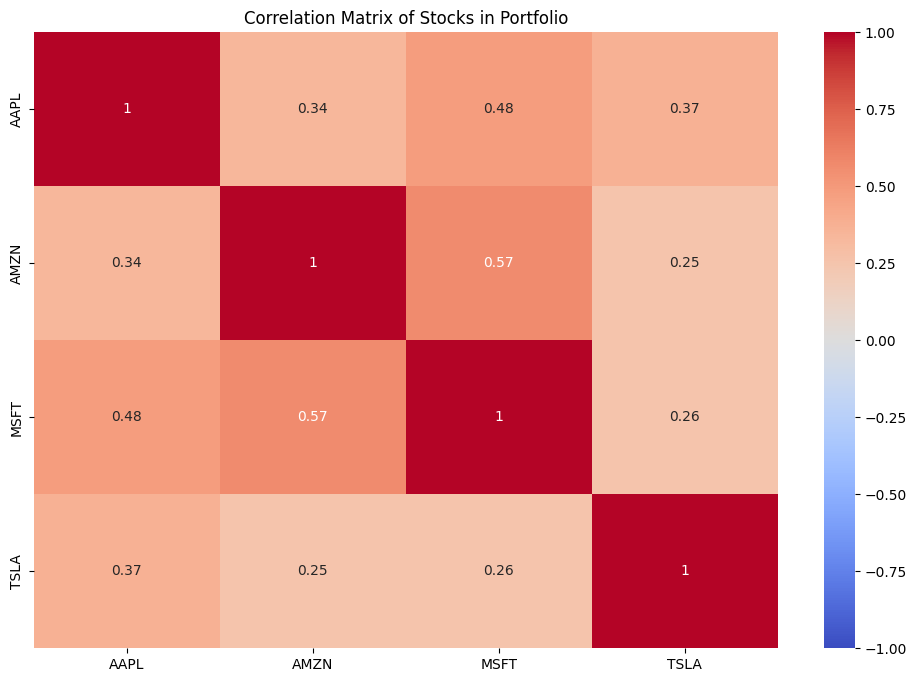

In [54]:
# Assuming 'data' DataFrame with stock prices has already been defined

# Calculate daily returns
daily_returns = data['Adj Close'].pct_change().dropna()

# Calculate correlation matrix
correlation_matrix = daily_returns.corr()

# Display heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Stocks in Portfolio')
plt.show()



*** STOCK PREDICTION MODEL LSTM ***

[*********************100%%**********************]  1 of 1 completed
Epoch 1/15
175/175 [==============================] - 4s 9ms/step - loss: nan - accuracy: 0.4830 - val_loss: nan - val_accuracy: 0.4800
Epoch 2/15
175/175 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.4835 - val_loss: nan - val_accuracy: 0.4800
Epoch 3/15
175/175 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.4835 - val_loss: nan - val_accuracy: 0.4800
Epoch 4/15
175/175 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.4835 - val_loss: nan - val_accuracy: 0.4800
Epoch 5/15
175/175 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.4835 - val_loss: nan - val_accuracy: 0.4800
Epoch 6/15
175/175 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.4835 - val_loss: nan - val_accuracy: 0.4800
Epoch 7/15
175/175 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.4835 - val_loss: nan - 

/home/paraspatange/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paraspatange/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paraspatange/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


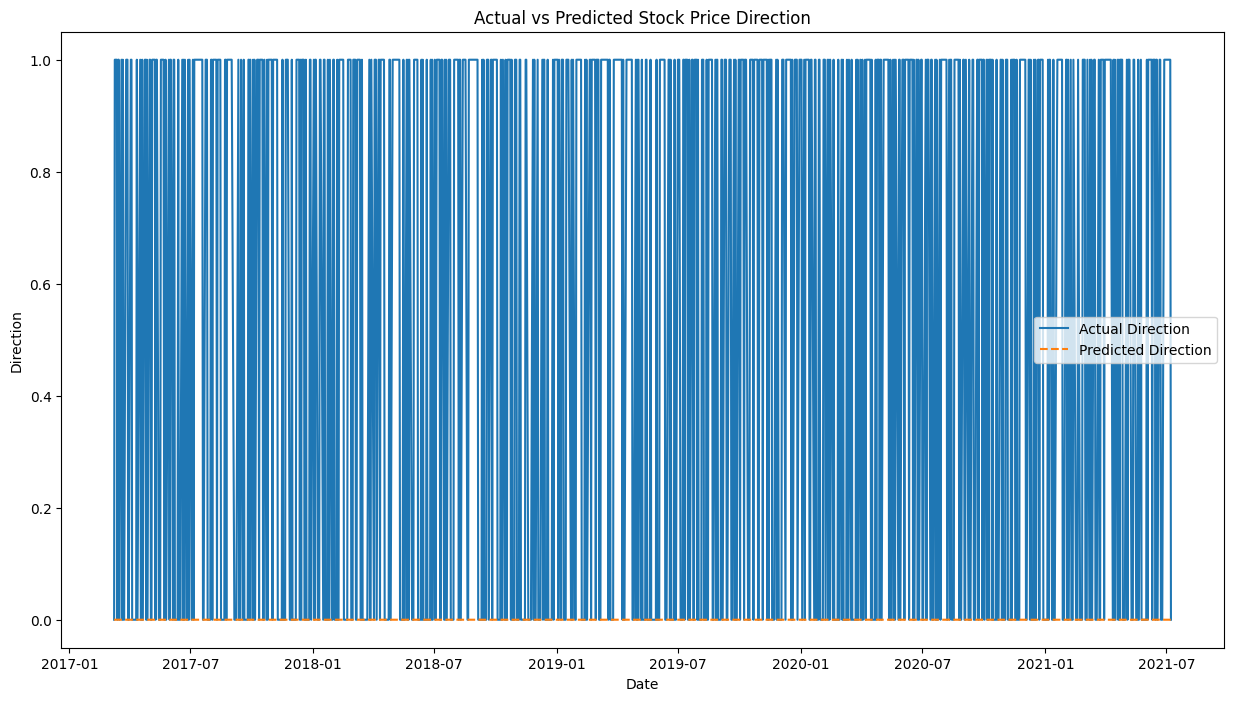

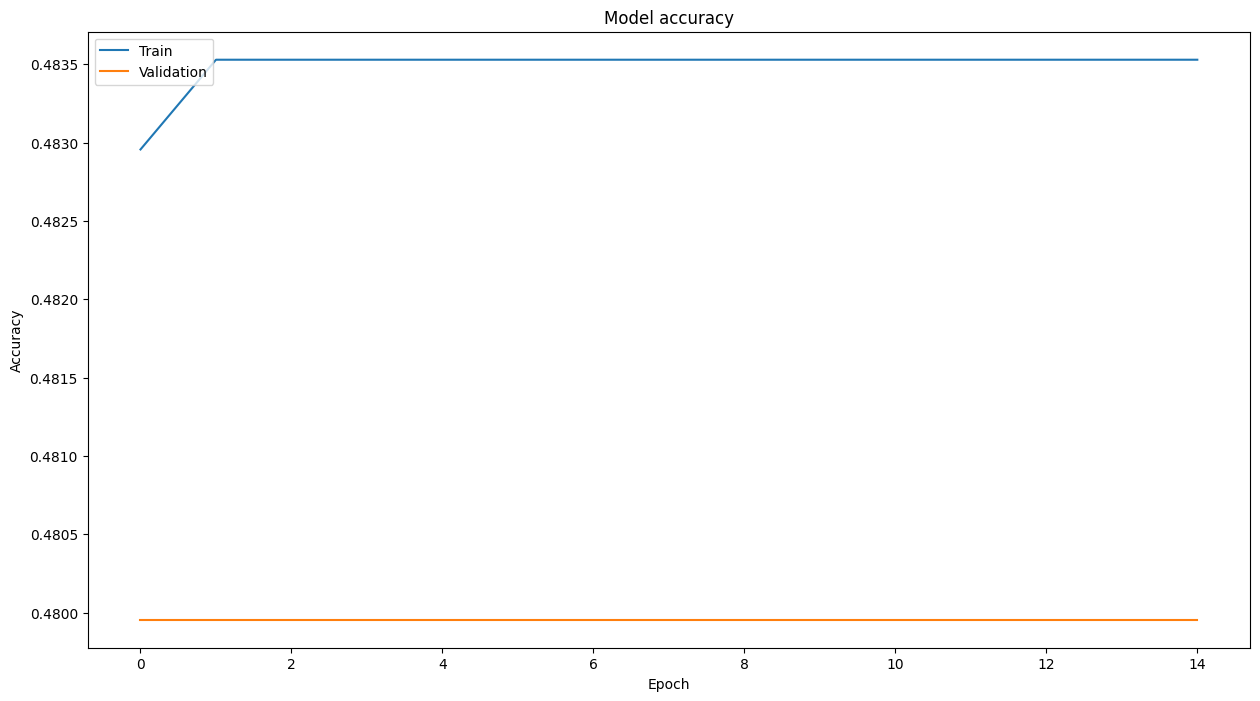

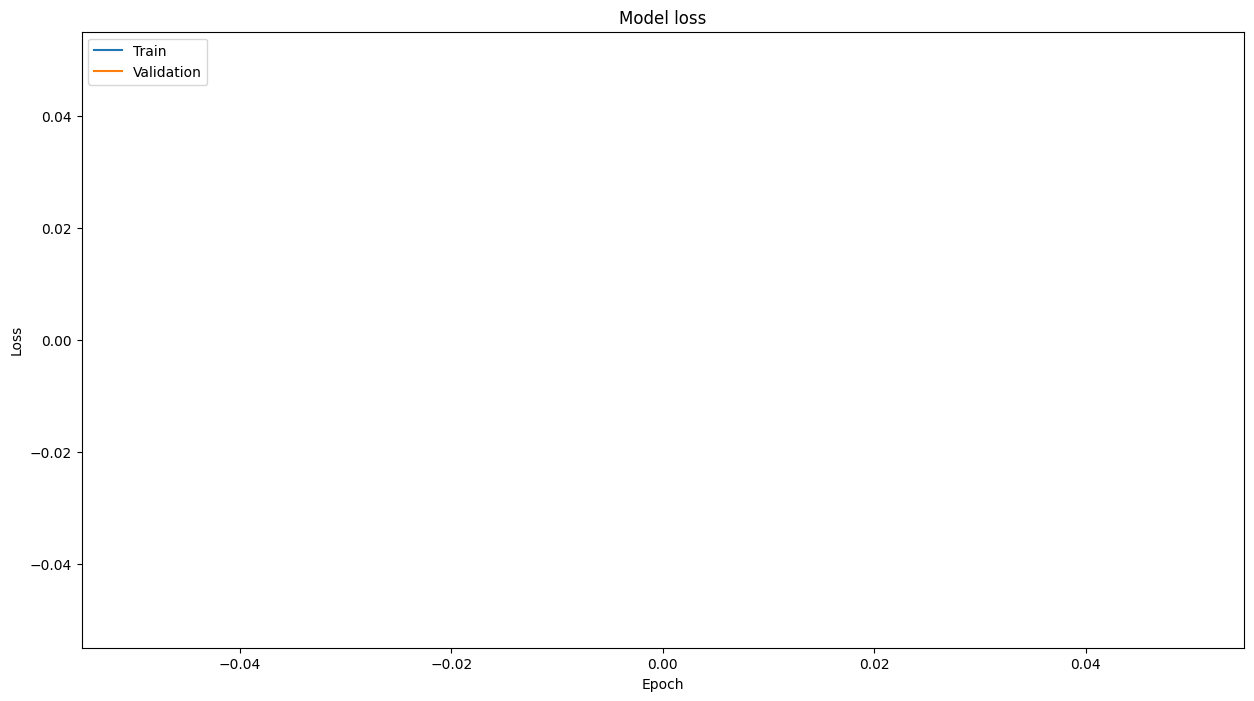

In [56]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Fetch historical stock data for Apple Inc. (AAPL)
ticker = "AAPL"
stock_data = yf.download(ticker, start="1999-11-01", end="2021-07-09")

# Ensure datetime index
stock_data.index = pd.to_datetime(stock_data.index)

# Calculate daily returns
stock_data['Return'] = stock_data['Close'].pct_change()

# Classify the direction: 1 if return > 0, else 0
stock_data['Direction'] = (stock_data['Return'] > 0).astype(int)

# Drop missing values
stock_data.dropna(inplace=True)

# Feature engineering: Use technical indicators (e.g., moving averages)
window_size = 50
stock_data[f"{window_size}day_SMA"] = stock_data["Close"].rolling(window=window_size).mean()
stock_data[f"{window_size}day_EMA"] = stock_data["Close"].ewm(span=window_size, adjust=False).mean()

# Prepare the dataset
features = stock_data[['Close', f'{window_size}day_SMA', f'{window_size}day_EMA']]
labels = stock_data['Direction']

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2, shuffle=False)

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model for classification
def build_lstm_classification_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build and train the LSTM model
lstm_model = build_lstm_classification_model((X_train.shape[1], 1))
history = lstm_model.fit(X_train, y_train, epochs=15, batch_size=20, validation_split=0.2)

# Predict using the LSTM model
y_pred = (lstm_model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot actual vs predicted directions
plt.figure(figsize=(15, 8))
plt.plot(stock_data.index[-len(y_test):], y_test, label='Actual Direction')
plt.plot(stock_data.index[-len(y_test):], y_pred, label='Predicted Direction', linestyle='--')
plt.title('Actual vs Predicted Stock Price Direction')
plt.xlabel('Date')
plt.ylabel('Direction')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(15, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(15, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Arima Model

Explanation:
1. Fetch Data: Download historical stock data.
2. ARIMA Model: Fit an ARIMA model to the training data.
3. Forecast: Forecast the next 1 to 3 days.
4. Plot: Plot the actual and forecasted prices.
5. Evaluate: Calculate and print RMSE for the forecast period.

[*********************100%%**********************]  1 of 1 completed


/home/paraspatange/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/paraspatange/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/paraspatange/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/paraspatange/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will 

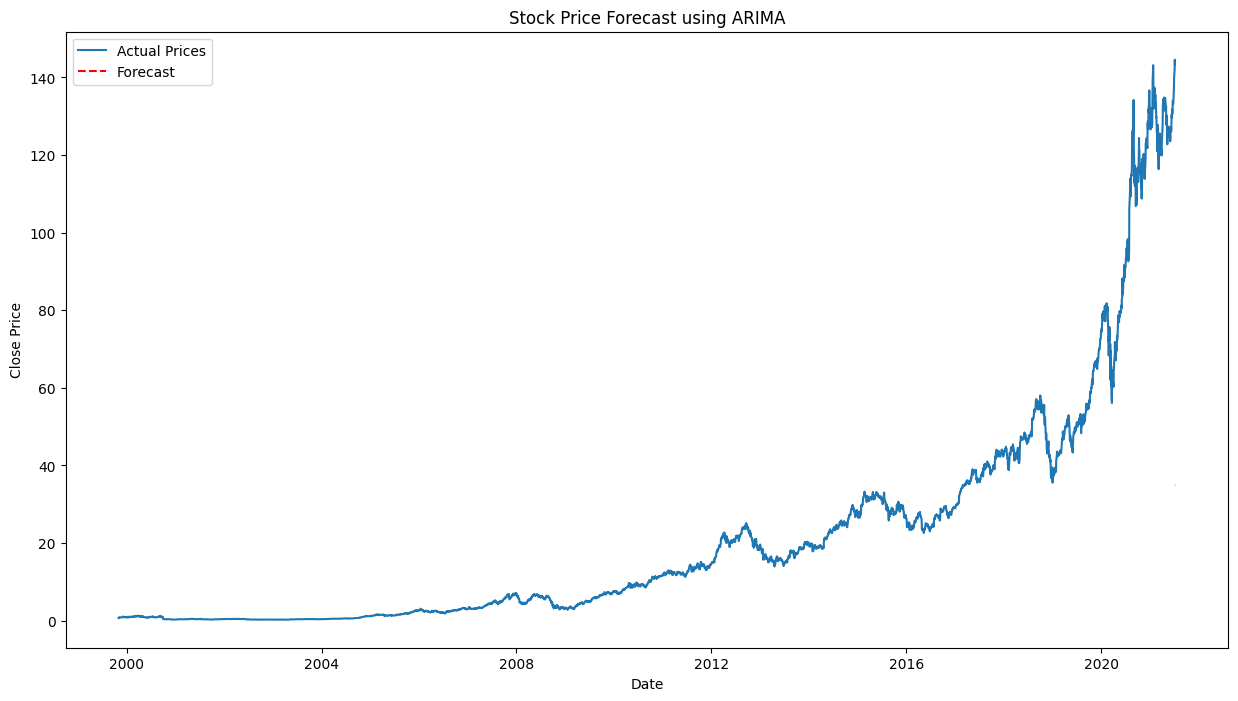

RMSE: 0.1546812239115091


In [58]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Fetch historical stock data
ticker = "AAPL"
stock_data = yf.download(ticker, start="1999-11-01", end="2021-07-09")

# Ensure datetime index
stock_data.index = pd.to_datetime(stock_data.index)

# Select the 'Close' price
data = stock_data['Close']

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit the ARIMA model
model = SARIMAX(train, order=(5, 1, 0), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast the next 1 to 3 days
forecast_steps = 3
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(data.index, data, label='Actual Prices')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', linestyle='--', color='red')
plt.title('Stock Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(test[:forecast_steps], forecast))
print(f'RMSE: {rmse}')


# XGBoost for Time Series Forecasting Model
Explanation:
1. Fetch Data: Download historical stock data.
2. Lag Features: Create lagged features to use as input for the XGBoost model.
3. Prepare Data: Split the data into training and testing sets and scale the features.
4. Train XGBoost: Train the XGBoost model on the training data.
5. Predict: Make predictions on the test data.
6. Plot: Plot the actual and predicted prices.

Evaluate: Calculate and print RMSE for the test period.


[*********************100%%**********************]  1 of 1 completed


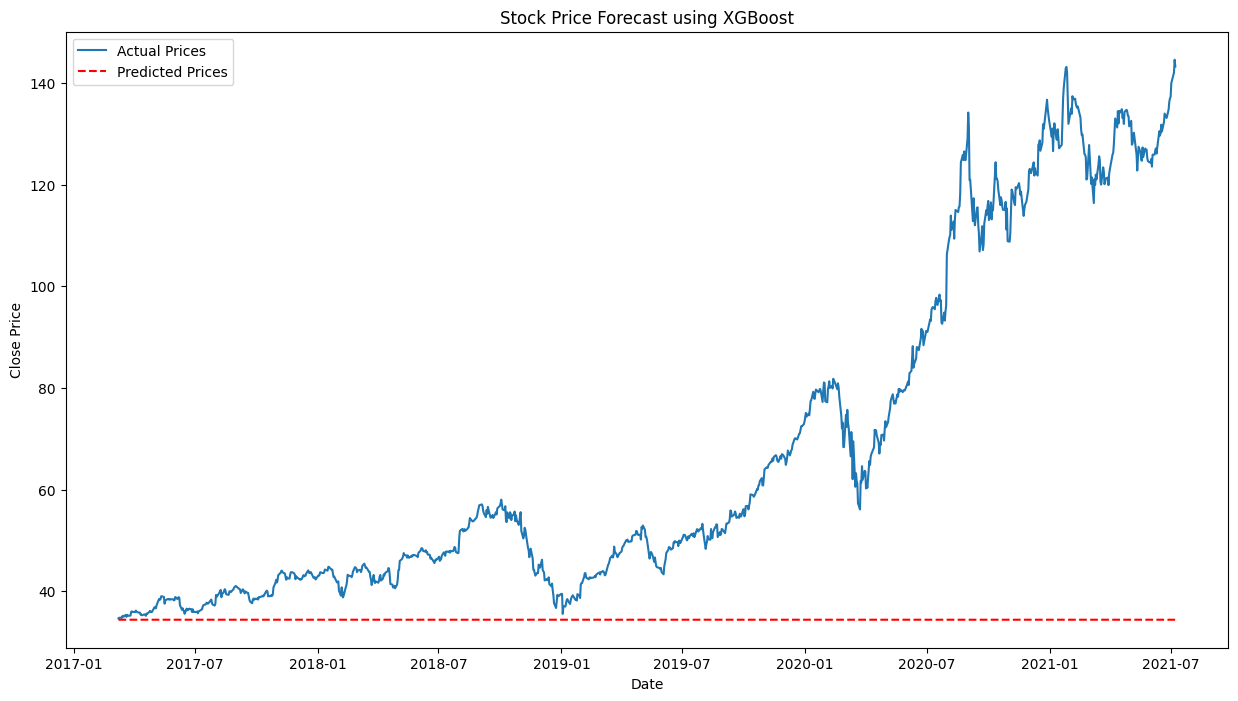

RMSE: 46.71510903916541


In [60]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Fetch historical stock data
ticker = "AAPL"
stock_data = yf.download(ticker, start="1999-11-01", end="2021-07-09")

# Ensure datetime index
stock_data.index = pd.to_datetime(stock_data.index)

# Feature engineering: Create lag features
def create_lag_features(data, lags=5):
    lagged_data = data.copy()
    for lag in range(1, lags + 1):
        lagged_data[f'lag_{lag}'] = lagged_data['Close'].shift(lag)
    return lagged_data.dropna()

# Create lag features
lagged_data = create_lag_features(stock_data[['Close']])

# Split the data into training and testing sets
train_size = int(len(lagged_data) * 0.8)
train, test = lagged_data[:train_size], lagged_data[train_size:]

# Prepare the data for XGBoost
X_train, y_train = train.drop(columns=['Close']), train['Close']
X_test, y_test = test.drop(columns=['Close']), test['Close']

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the XGBoost model
xgboost_model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01)
xgboost_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgboost_model.predict(X_test_scaled)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(stock_data.index[-len(test):], y_test, label='Actual Prices')
plt.plot(stock_data.index[-len(test):], y_pred, label='Predicted Prices', linestyle='--', color='red')
plt.title('Stock Price Forecast using XGBoost')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


## Buy/Sell Signal Generation
To generate buy/sell signals, you can use a simple strategy based on the model's predictions. For example, if the model predicts an increase in price, it can signal a "buy," and if it predicts a decrease, it can signal a "sell."

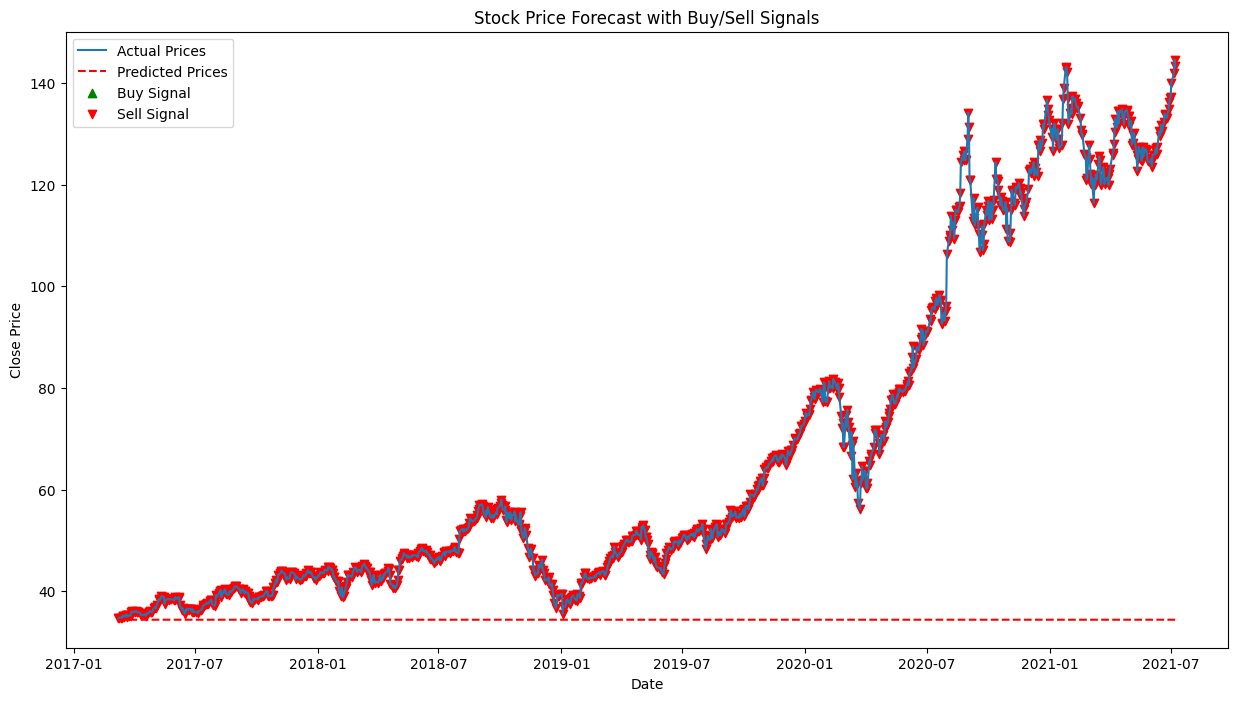

In [61]:
# Generate buy/sell signals based on predictions
signals = pd.DataFrame(index=stock_data.index[-len(test):])
signals['Actual'] = y_test
signals['Predicted'] = y_pred
signals['Signal'] = np.where(signals['Predicted'].shift(-1) > signals['Actual'], 1, 0)  # 1 for Buy, 0 for Sell

# Plot signals
plt.figure(figsize=(15, 8))
plt.plot(stock_data.index[-len(test):], y_test, label='Actual Prices')
plt.plot(stock_data.index[-len(test):], y_pred, label='Predicted Prices', linestyle='--', color='red')
plt.scatter(signals.index[signals['Signal'] == 1], signals['Actual'][signals['Signal'] == 1], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(signals.index[signals['Signal'] == 0], signals['Actual'][signals['Signal'] == 0], label='Sell Signal', marker='v', color='red', alpha=1)
plt.title('Stock Price Forecast with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
